# Predicting PPIs using GCNs

# Phase 1: Problem Definition.

## GCNs

##### Ways to Analyze Networks
 - Predict a type of a given node:
 Node classification

- Predict whether two nodes are linked
§ Link prediction

Identify densely linked clusters of nodes

Community detection
How similar are two nodes/networks
Network similarity

## Question and problem definitionb

#### Question and problem defintion
Proteins performs a vast array of functions such as: catalysing  metabolic reaction, providing structure 
to cells and organisms and transporting molecules for one location to another.

In fact, proteins are vital and macromolecules, at both cellular and systemic levels, but they are rarely act alone.
    
Protein can interact with many types of molecules or ith other proteins, for example DNA Interactions with Proteins
that play an essential role in the regulation of gene expression, as well as RNA transport and translation. Some PPIs are the basis of several diseaces, such as Alzheimer's disease, cancer ans so on.



the aim of this topic : use machine learning to create and improve a model that predict a link between two protein using ...(dataset ). 
    

# Phase 2: Data Prepossessing.

In [115]:
import numpy as np
import requests 
import networkx as nx
import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data acquisition

In [49]:

data = requests.get('http://snap.stanford.edu/deepnetbio-ismb/ipynb/yeast.edgelist')

In [5]:
with open('yeast.edgelist', 'w') as f:
    f.write(data.text)

In [1]:
! ls

basic_purport.html   club.edgelist    Phase_1.pdf	     test.edgelist
basic_purport.ipynb  environment.yml  Predicting_PPIs.ipynb  yeast.edgelist
basic_purport.pdf    images	      README.md


### Reading Yeast.edgelist file



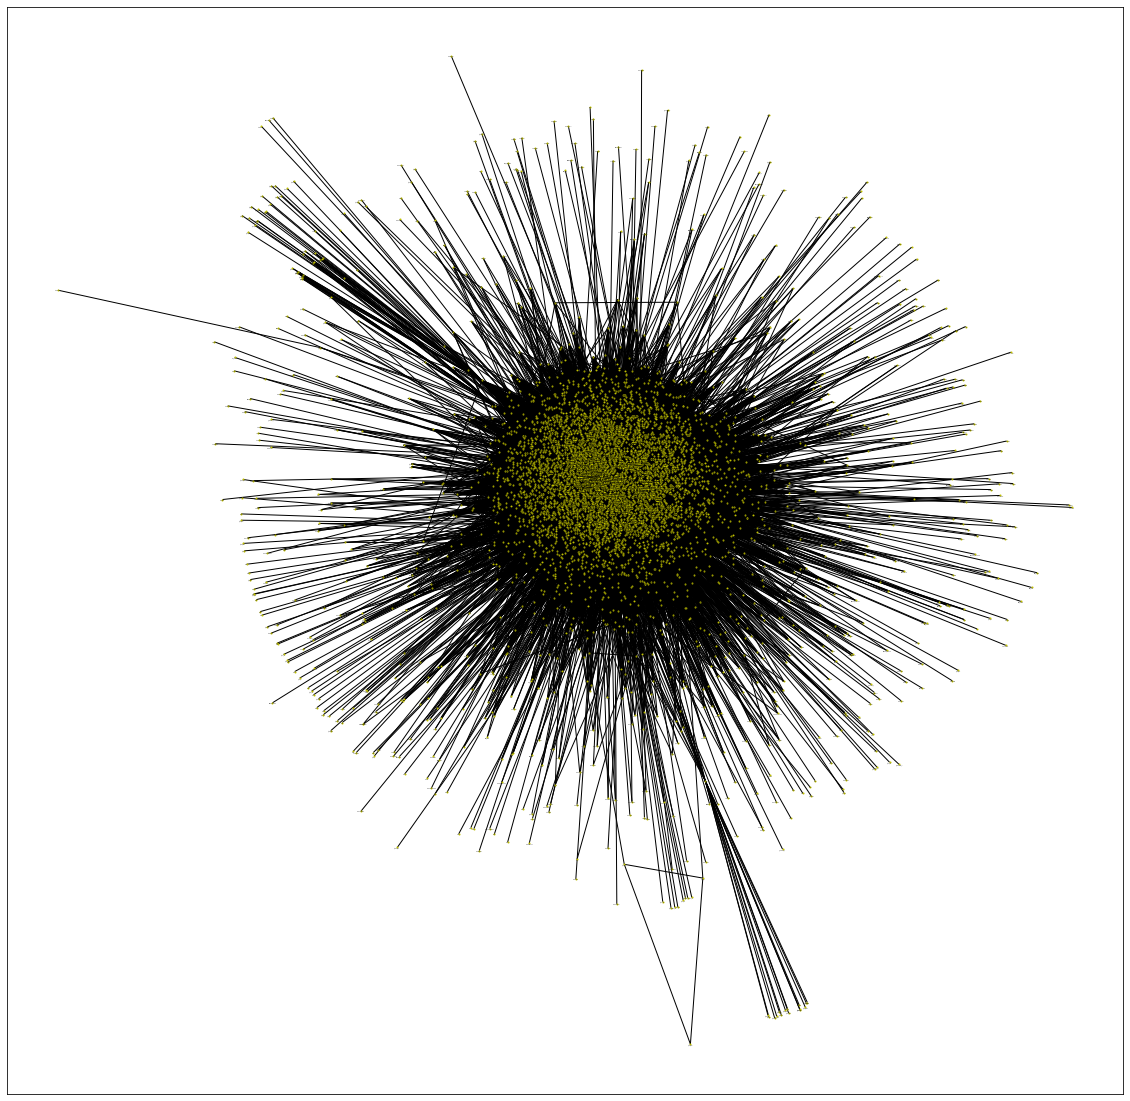

6526
532180


In [14]:

G = nx.read_edgelist('yeast.edgelist')

plt.figure(1, figsize=(20, 20))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='y', node_size=1)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=1)
plt.show()

print(G.number_of_nodes())
print(G.number_of_edges())

### Visualize a small dataset 
Create a New File 'subgraph.edgelist' with few edges to have a good Visualization.


In [2]:
import networkx as nx
import pylab as plt
from networkx.algorithms import community


In [168]:

with open('yeast.edgelist', 'r') as f:
    for i in range(10):
        line = f.readline()
        with open('subgraph_1.edgelist', 'a') as fw:
            fw.write(line)

In [7]:
!ls

basic_purport.html   club.edgelist    Phase_1.pdf	     test.edgelist
basic_purport.ipynb  environment.yml  Predicting_PPIs.ipynb  yeast.edgelist
basic_purport.pdf    images	      README.md


Visualize a subgraph with:
309 node and 362 edge

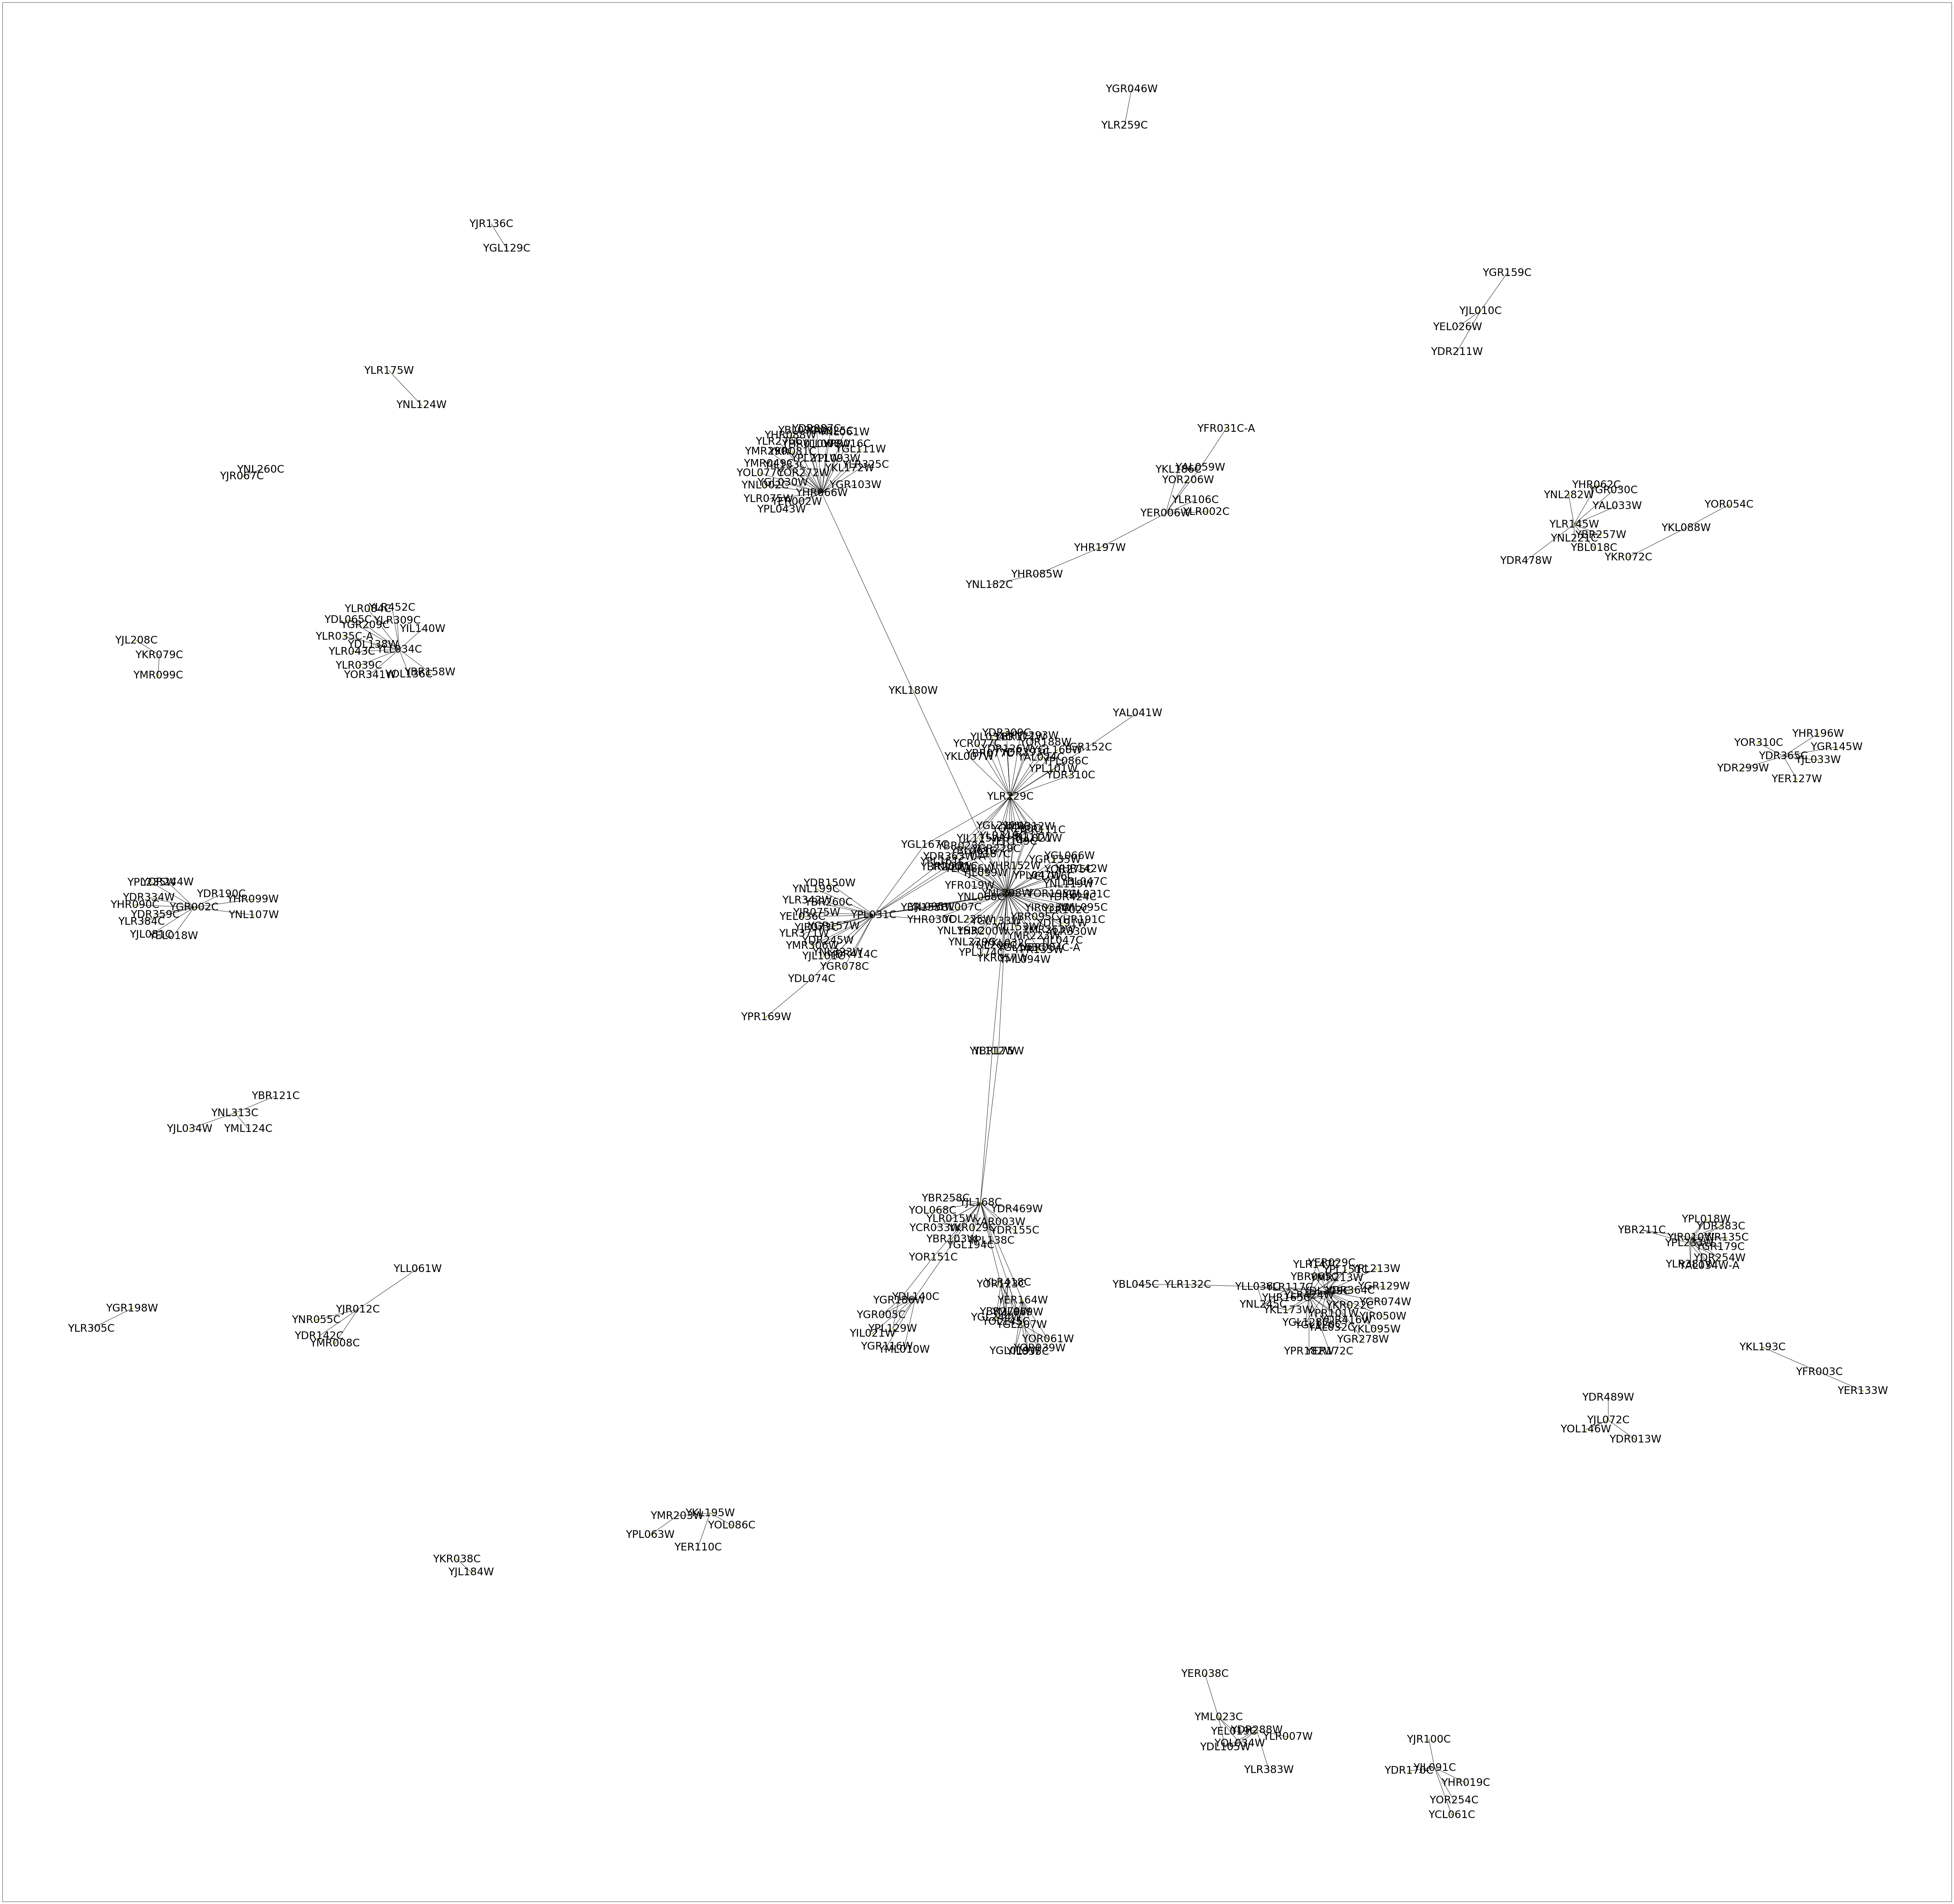

Number of Nodes:  309
Number of Edges:  362


In [192]:
import networkx as nx
import pylab as plt

fh = open('subgraph_1.edgelist', 'r')

G = nx.read_edgelist(fh)


plt.figure(1, figsize=(100, 100))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='y', node_size=10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=30)
plt.show()

print('Number of Nodes: ', G.number_of_nodes())
print('Number of Edges: ', G.number_of_edges())

In [193]:
adj = nx.adjacency_matrix(G)
print(adj)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 197)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 197)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  :	:
  (293, 299)	1
  (293, 300)	1
  (293, 301)	1
  (293, 302)	1
  (293, 303)	1
  (293, 304)	1
  (293, 305)	1
  (293, 306)	1
  (293, 307)	1
  (293, 308)	1
  (294, 293)	1
  (295, 293)	1
  (296, 293)	1
  (297, 293)	1
  (298, 293)	1
  (299, 293)	1
  (300, 293)	1
  (301, 293)	1
  (302, 293)	1
  (303, 293)	1
  (304, 293)	1
  (305, 293)	1
  (306, 293)	1
  (307, 293)	1
  (308, 293)	1


In [194]:
print(adj.toarray().shape)
adjcency_matrix = adj.toarray()

(309, 309)


In [152]:
# create a dataframe with 5 features
# 

import pandas as pd
 
df = pd.DataFrame(columns=['Protein_1', 'Protein_2', 'Link', 'Common_Neighbors', 'Jaccard_Similarity'])    
l = 0
for i in range(adjcency_matrix.shape[0]):
    for j in range(adjcency_matrix.shape[0]):
        if i!=j and adjcency_matrix[i][j] == 1 :
            Common_Neighbors = sum(adjcency_matrix[i]*adjcency_matrix[j])
            union = sum(adjcency_matrix[i]+adjcency_matrix[j]) - Common_Neighbors
            Jaccard_Similarity = Common_Neighbors / union
            if Jaccard_Similarity == 1:
                print(Common_Neighbors, union)
            df.loc[l] = [i, j, 1, Common_Neighbors, Jaccard_Similarity]
            l = l+1
        else:
            if i!=j and adjcency_matrix[i][j] == 0 :
                for k in range(j):
                    if adjcency_matrix[i][k] == 1 and adjcency_matrix[k][j] == 1:
                        Common_Neighbors = sum(adjcency_matrix[i]*adjcency_matrix[j])
                        union = sum(adjcency_matrix[i]+adjcency_matrix[j]) - Common_Neighbors
                        Jaccard_Similarity = Common_Neighbors / union
                        df.loc[k] = [i, j, 0, Common_Neighbors, Jaccard_Similarity]
                        l = l+1
                        break
                        
                
               
            
        
            

In [195]:
df.describe()

,Protein_1,Protein_2,Link,Common_Neighbors,Jaccard_Similarity
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,139.066313,138.905836,0.942971,0.771883,0.083386
std,91.587292,91.680216,0.232052,1.564362,0.203332
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.250000,47.000000,1.000000,0.000000,0.000000
50%,146.000000,146.000000,1.000000,0.000000,0.000000
75%,219.000000,219.000000,1.000000,1.000000,0.041667
max,308.000000,308.000000,1.000000,16.000000,1.000000


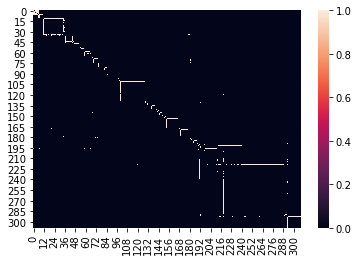

In [147]:
ax = sns.heatmap(adjcency_matrix)


the darker the color of the small squares in the heatmap, the more likely the value is 0.
            

In [139]:
print(df.head(50))

     Protein_1  Protein_2  Link  Common_Neighbors  Jaccard_Similarity
0        197.0        6.0   0.0               3.0            0.115385
1          0.0        2.0   1.0               6.0            0.750000
2          0.0        3.0   1.0               5.0            0.625000
3          0.0        4.0   1.0               5.0            0.555556
4          7.0        5.0   0.0               2.0            0.181818
5          0.0        6.0   1.0               5.0            0.384615
6         11.0       10.0   0.0               2.0            1.000000
11         0.0      197.0   1.0               1.0            0.041667
197      211.0      210.0   0.0               1.0            0.500000
25         1.0        0.0   1.0               5.0            0.625000
26         1.0        2.0   1.0               5.0            0.625000
27         1.0        3.0   1.0               5.0            0.714286
28         1.0        4.0   1.0               5.0            0.625000
29         1.0      

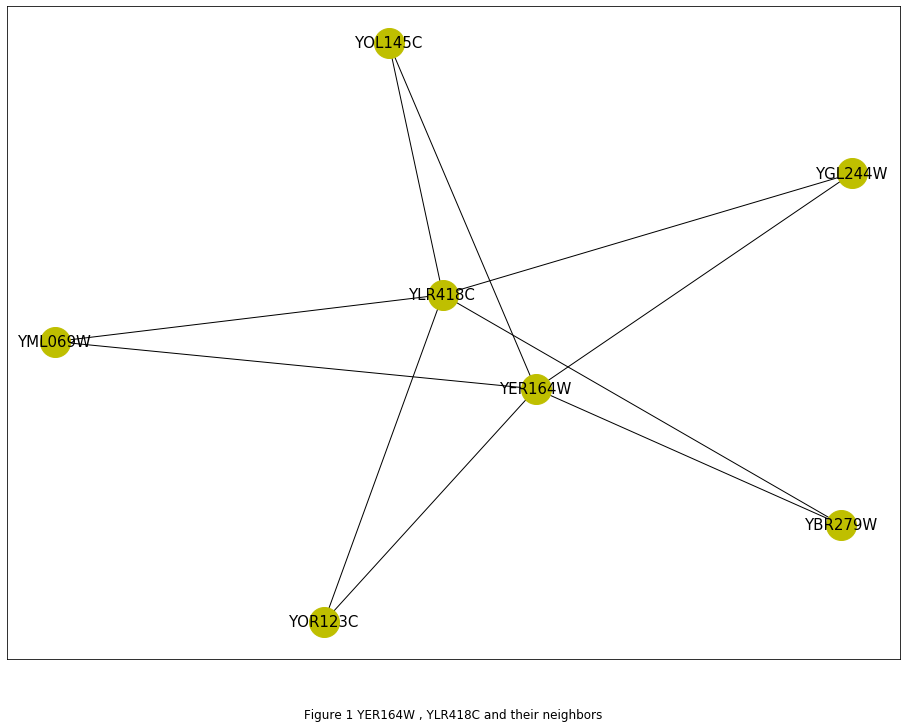

In [187]:
fh = open('subgraph_2.edgelist', 'r')

G = nx.read_edgelist(fh)


plt.figure(1, figsize=(16, 12))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='y', node_size=900)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.title('Figure 1 YER164W , YLR418C and their neighbors', y=-0.1)
plt.show()


After the analysis of the graph we use Jaccard Similarity to measure the similarity between two nodes 
not predicting the linkage, that means two proteins with heigh Jaccard Similarity do not necessarily need
to interact with each other or increase the probability of thier interaction.

Assume that the link between YER164W and YGL244W removed manually in figure 1, since we have a hight Jaccard Similarity between YGL244W's neigbhors and YLR418C then YGL244W may interact with YGL244W.


# Phase 3: Implementation.

# Phase 4: Empirical Evaluations and Discussion